# Initialization

In [42]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [5]:
trainDEFSDf = pd.read_csv("F:\\UvA\\app\\trainDF_dataframeTPTNModeling_0d5FinalScoreRatioDEFilterSTD.csv")
testDEFSDf = pd.read_csv("F:\\UvA\\app\\testDF_dataframeTPTNModeling_0d5FinalScoreRatioDEFilterSTD.csv")
noTeaDEFSDf = pd.read_csv("F:\\UvA\\app\\noTeaDF_dataframeTPTNModeling_0d5FinalScoreRatioDEFilterSTD.csv")
TeaDEFSDf = pd.read_csv("F:\\UvA\\app\\TeaDF_dataframeTPTNModeling_0d5FinalScoreRatioDEFilterSTD.csv")

In [6]:
trainDEFSDf.describe()

,ENTRY,RefMatchFragRatio,UsrMatchFragRatio,MS1Error,MS2Error,MS2ErrorStd,MatchDiff,DirectMatch,ReversMatch,FinalScoreRatio,MONOISOTOPICMASS,FPpredictRi,CNLpredictRi,DeltaRi,LABEL,Leverage,LeverageOfLeverage
count,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,4.856310e+05,485631.000000,485631.000000,485631.000000,485631.000000,485631.000000,485631.000000
mean,2.539671e+06,-2.539999e-17,-1.308041e-17,-1.112987e-17,-2.575114e-17,-1.512880e-16,5.925689e-18,9.978201e-17,7.062177e-17,-2.149489e-16,3.772688e-17,645.804991,600.140969,-0.045664,0.311574,0.009285,0.009285
std,1.340881e+06,1.506754e-01,1.578537e-01,1.066236e-01,9.195086e-02,1.406494e-01,1.018652e-01,1.424316e-01,1.579549e-01,9.956073e-02,1.131974e-01,271.670423,148.422277,0.206699,0.463137,0.009743,0.009743
min,2.450000e+02,-6.746780e-01,-6.831099e-01,-4.996170e-01,-1.020003e-01,-2.818502e-01,-5.255196e-01,-8.685603e-01,-8.531309e-01,-5.148202e-01,-4.181067e-01,-116.695212,67.614783,-0.846462,0.000000,0.000481,0.000481
25%,1.384040e+06,-9.331749e-02,-1.000397e-01,3.830069e-04,-3.057171e-02,-1.000320e-01,-3.903308e-02,-4.856033e-02,-5.093310e-02,-5.463966e-02,-7.645490e-02,459.086607,498.893640,-0.167457,0.000000,0.004115,0.004115
50%,2.752383e+06,2.405448e-02,2.979937e-02,3.830069e-04,-3.057171e-02,-9.122901e-03,-1.195246e-03,5.143967e-02,5.895701e-02,8.994035e-03,6.266434e-03,630.313098,610.988537,-0.028443,0.000000,0.006369,0.006369
75%,3.913228e+06,1.162537e-01,1.223788e-01,3.830069e-04,4.085686e-02,8.178619e-02,4.204800e-02,1.014397e-01,1.139021e-01,6.385510e-02,7.164016e-02,837.259428,704.373614,0.089070,1.000000,0.010753,0.010753
max,4.103845e+06,3.253220e-01,3.168901e-01,5.003830e-01,8.979997e-01,7.181498e-01,4.744804e-01,1.314397e-01,1.468691e-01,4.851798e-01,5.818933e-01,1413.200756,1260.025609,0.772752,1.000000,0.142857,0.142857


In [16]:
trainDEFSDf = trainDEFSDf[trainDEFSDf.columns[4:14]]
testDEFSDf = testDEFSDf[testDEFSDf.columns[4:14]]
noTeaDEFSDf = noTeaDEFSDf[noTeaDEFSDf.columns[4:14]]
TeaDEFSDf = TeaDEFSDf[TeaDEFSDf.columns[4:14]]


In [23]:
trainDEFSDf

,RefMatchFragRatio,UsrMatchFragRatio,MS1Error,MS2Error,MS2ErrorStd,MatchDiff,DirectMatch,ReversMatch,FinalScoreRatio,MONOISOTOPICMASS
0,-0.138695,0.154874,0.000383,-0.102000,-0.100032,0.031237,0.12144,0.069946,0.113821,0.053030
1,-0.167658,0.154874,0.000383,-0.102000,-0.100032,0.031237,0.12144,0.069946,0.110744,0.053030
2,-0.187724,0.140020,0.000383,-0.102000,-0.100032,0.031237,0.12144,0.069946,0.098374,0.053030
3,-0.175086,0.140020,0.000383,-0.102000,-0.100032,0.031237,0.12144,0.069946,0.098374,0.053030
4,-0.153687,0.140020,0.000383,-0.102000,-0.100032,0.031237,0.12144,0.069946,0.098374,0.053030
...,...,...,...,...,...,...,...,...,...,...
485626,0.212190,0.060131,0.000383,0.112285,0.081786,-0.293087,-0.62856,-0.094889,-0.182645,-0.005471
485627,0.062637,-0.058195,0.000383,0.040857,0.081786,-0.120114,-0.31856,-0.105878,-0.208773,-0.005471
485628,0.099057,-0.058195,0.000383,0.040857,0.081786,-0.266060,-0.58856,-0.105878,-0.305744,-0.005471
485629,0.146011,-0.058195,0.000383,0.112285,0.172695,-0.330925,-0.70856,-0.105878,-0.346245,-0.005471


In [28]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="viridis")

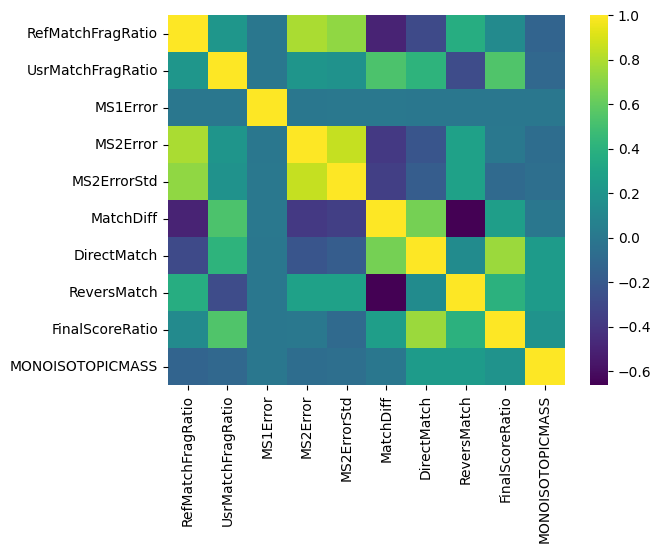

In [29]:
sns_heatmap(trainDEFSDf.corr())

In [60]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

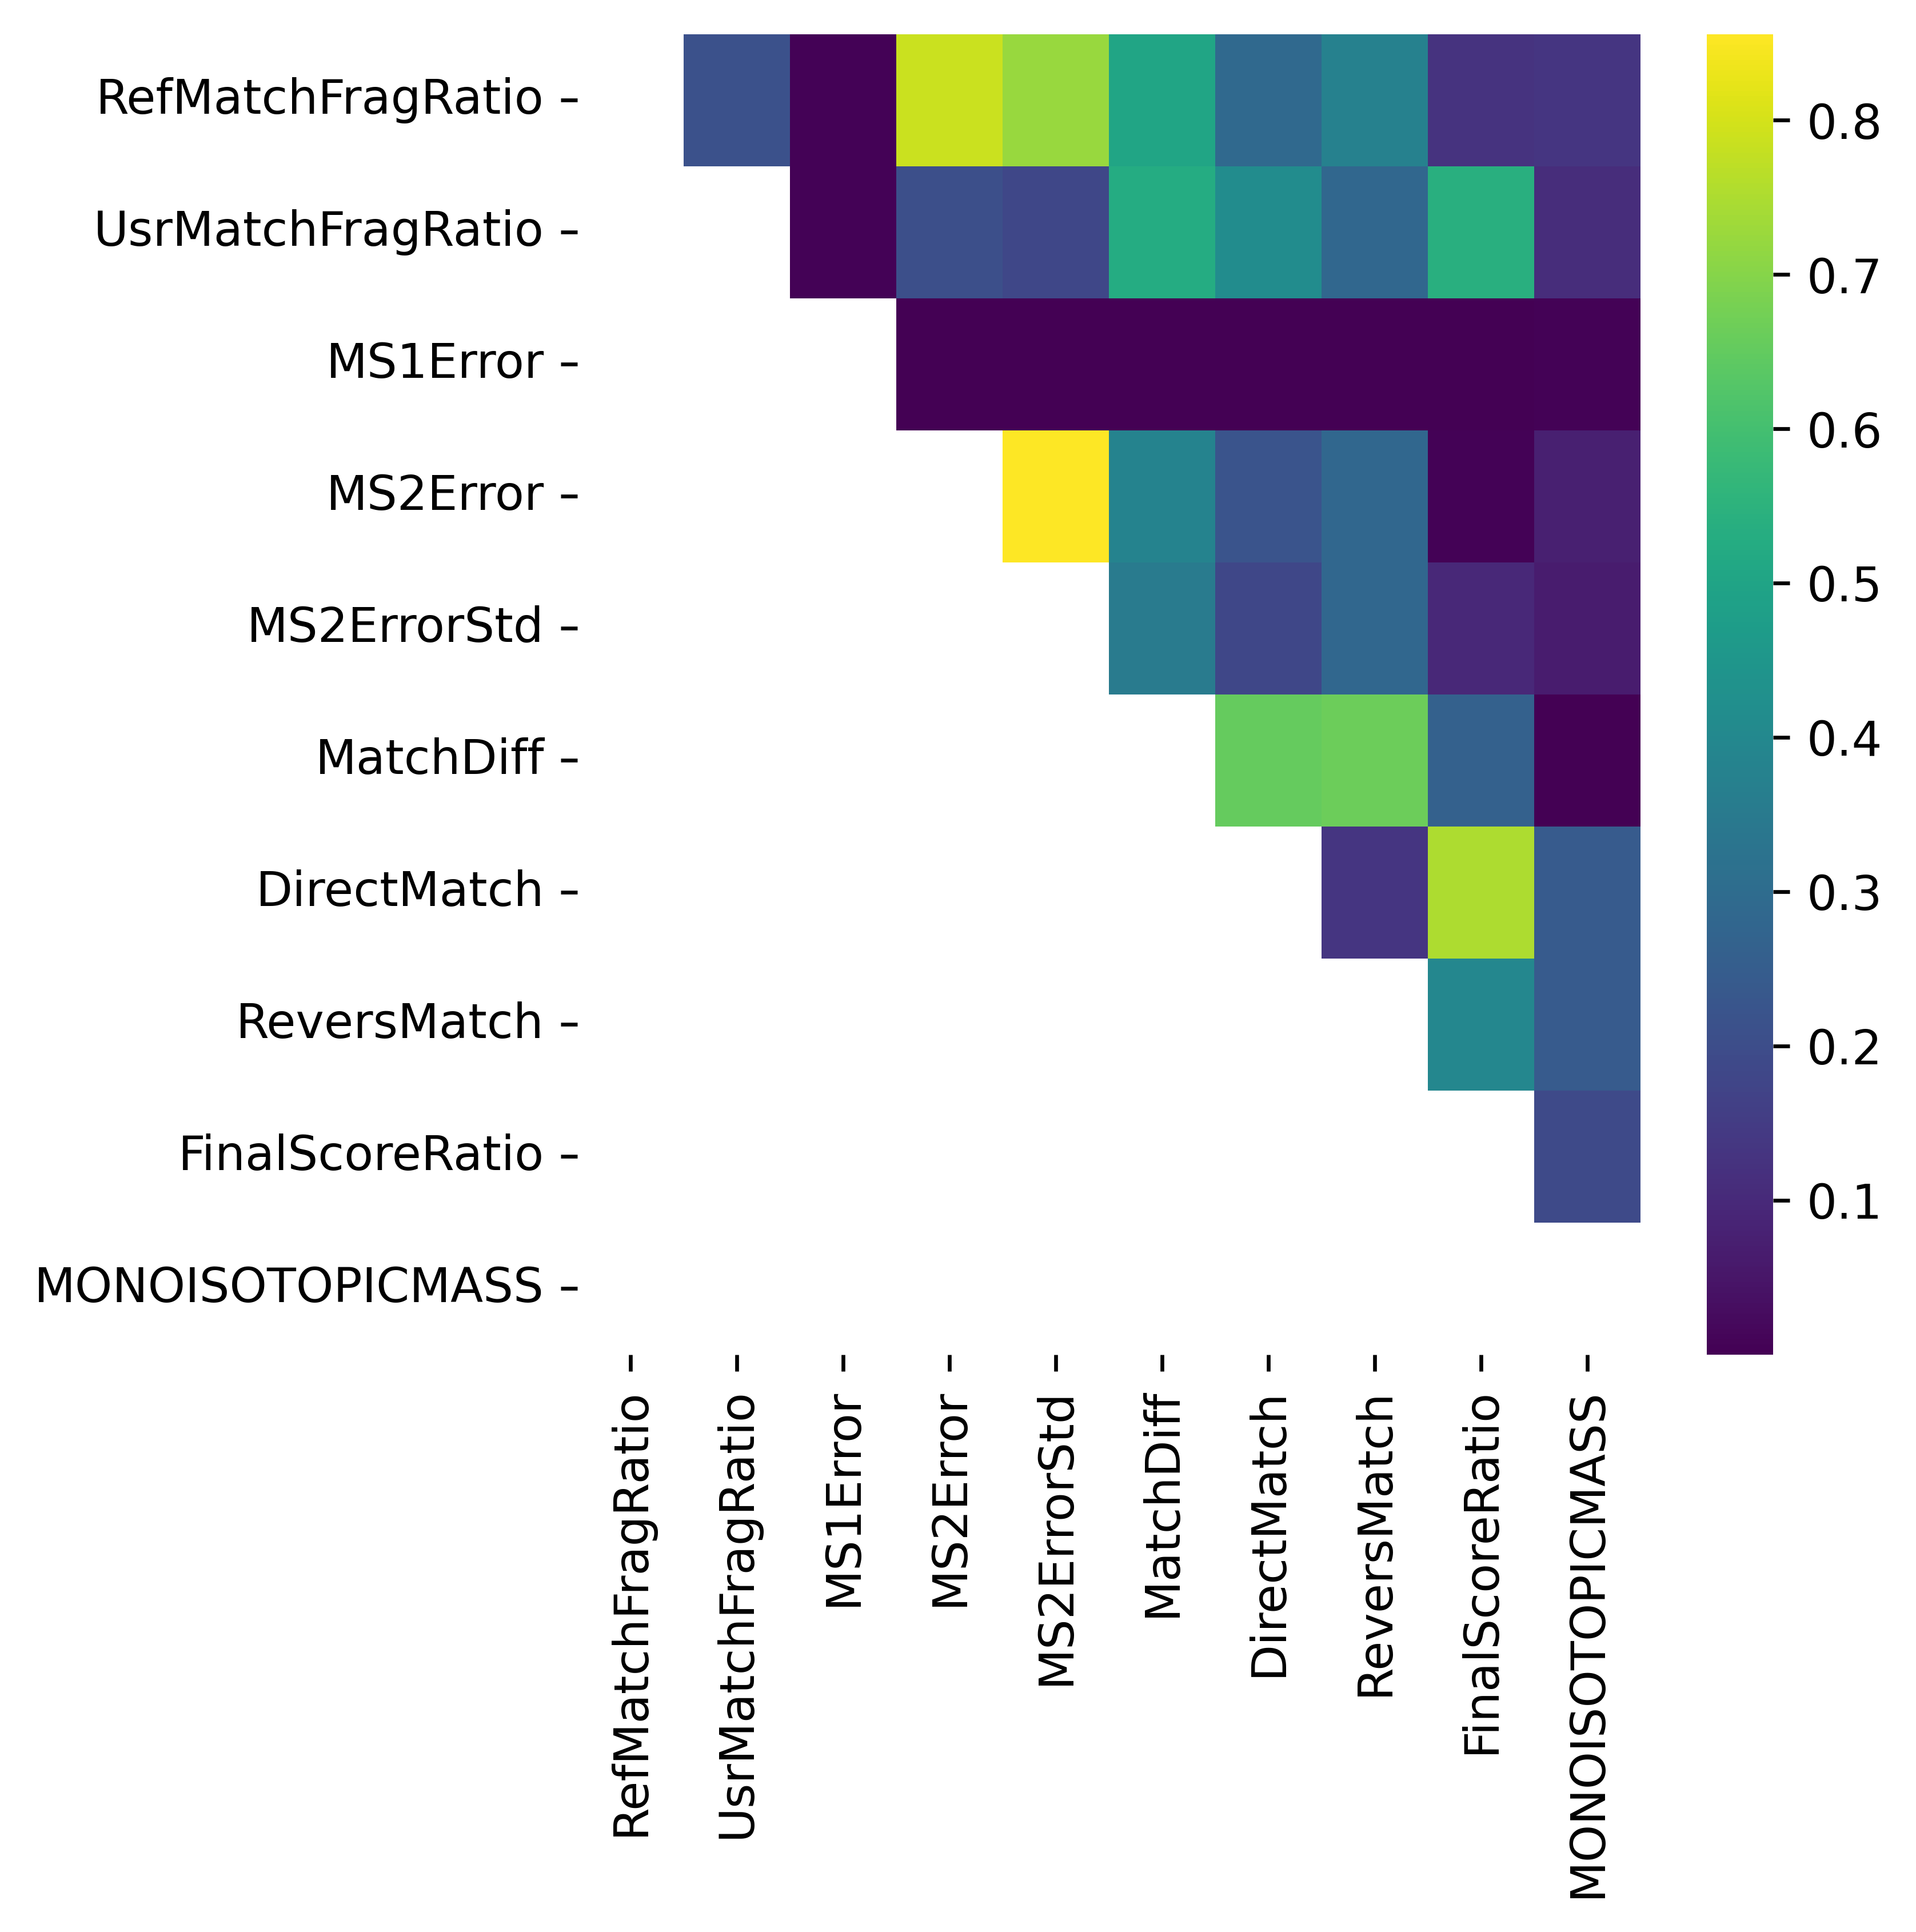

In [61]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

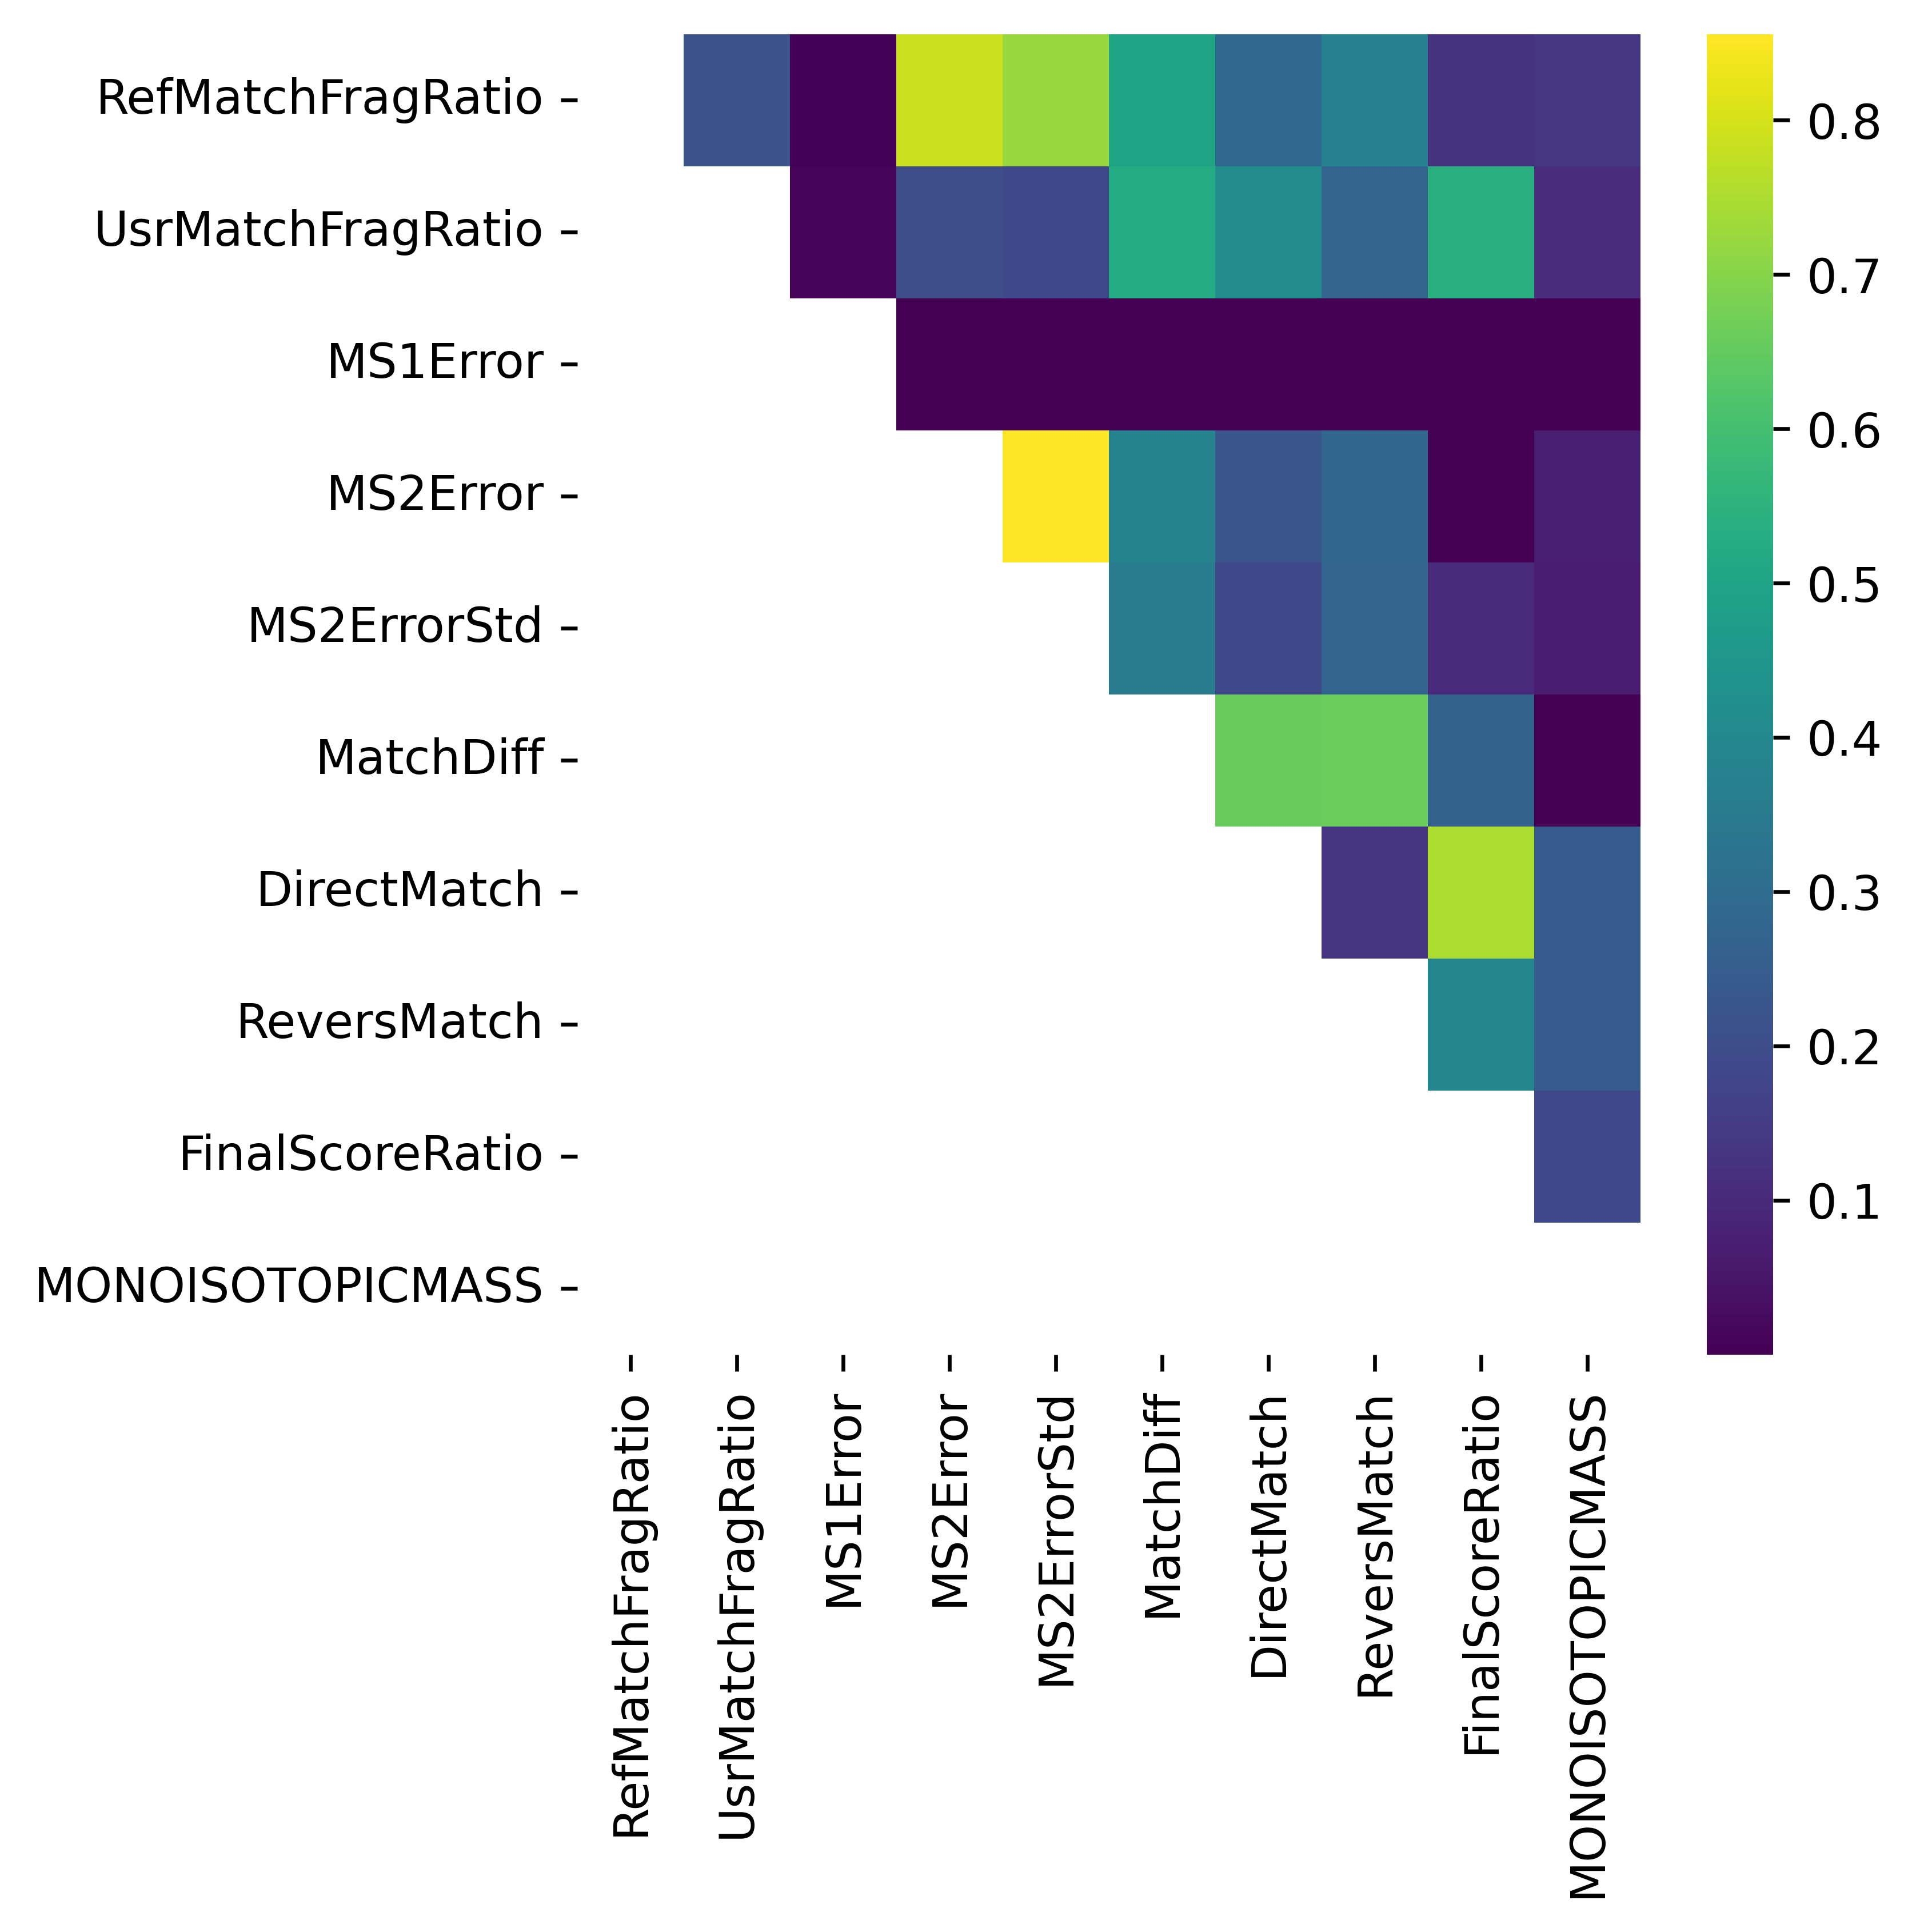

In [65]:
sns_heatmap(mz_corr(testDEFSDf, "testDEFSDf"))

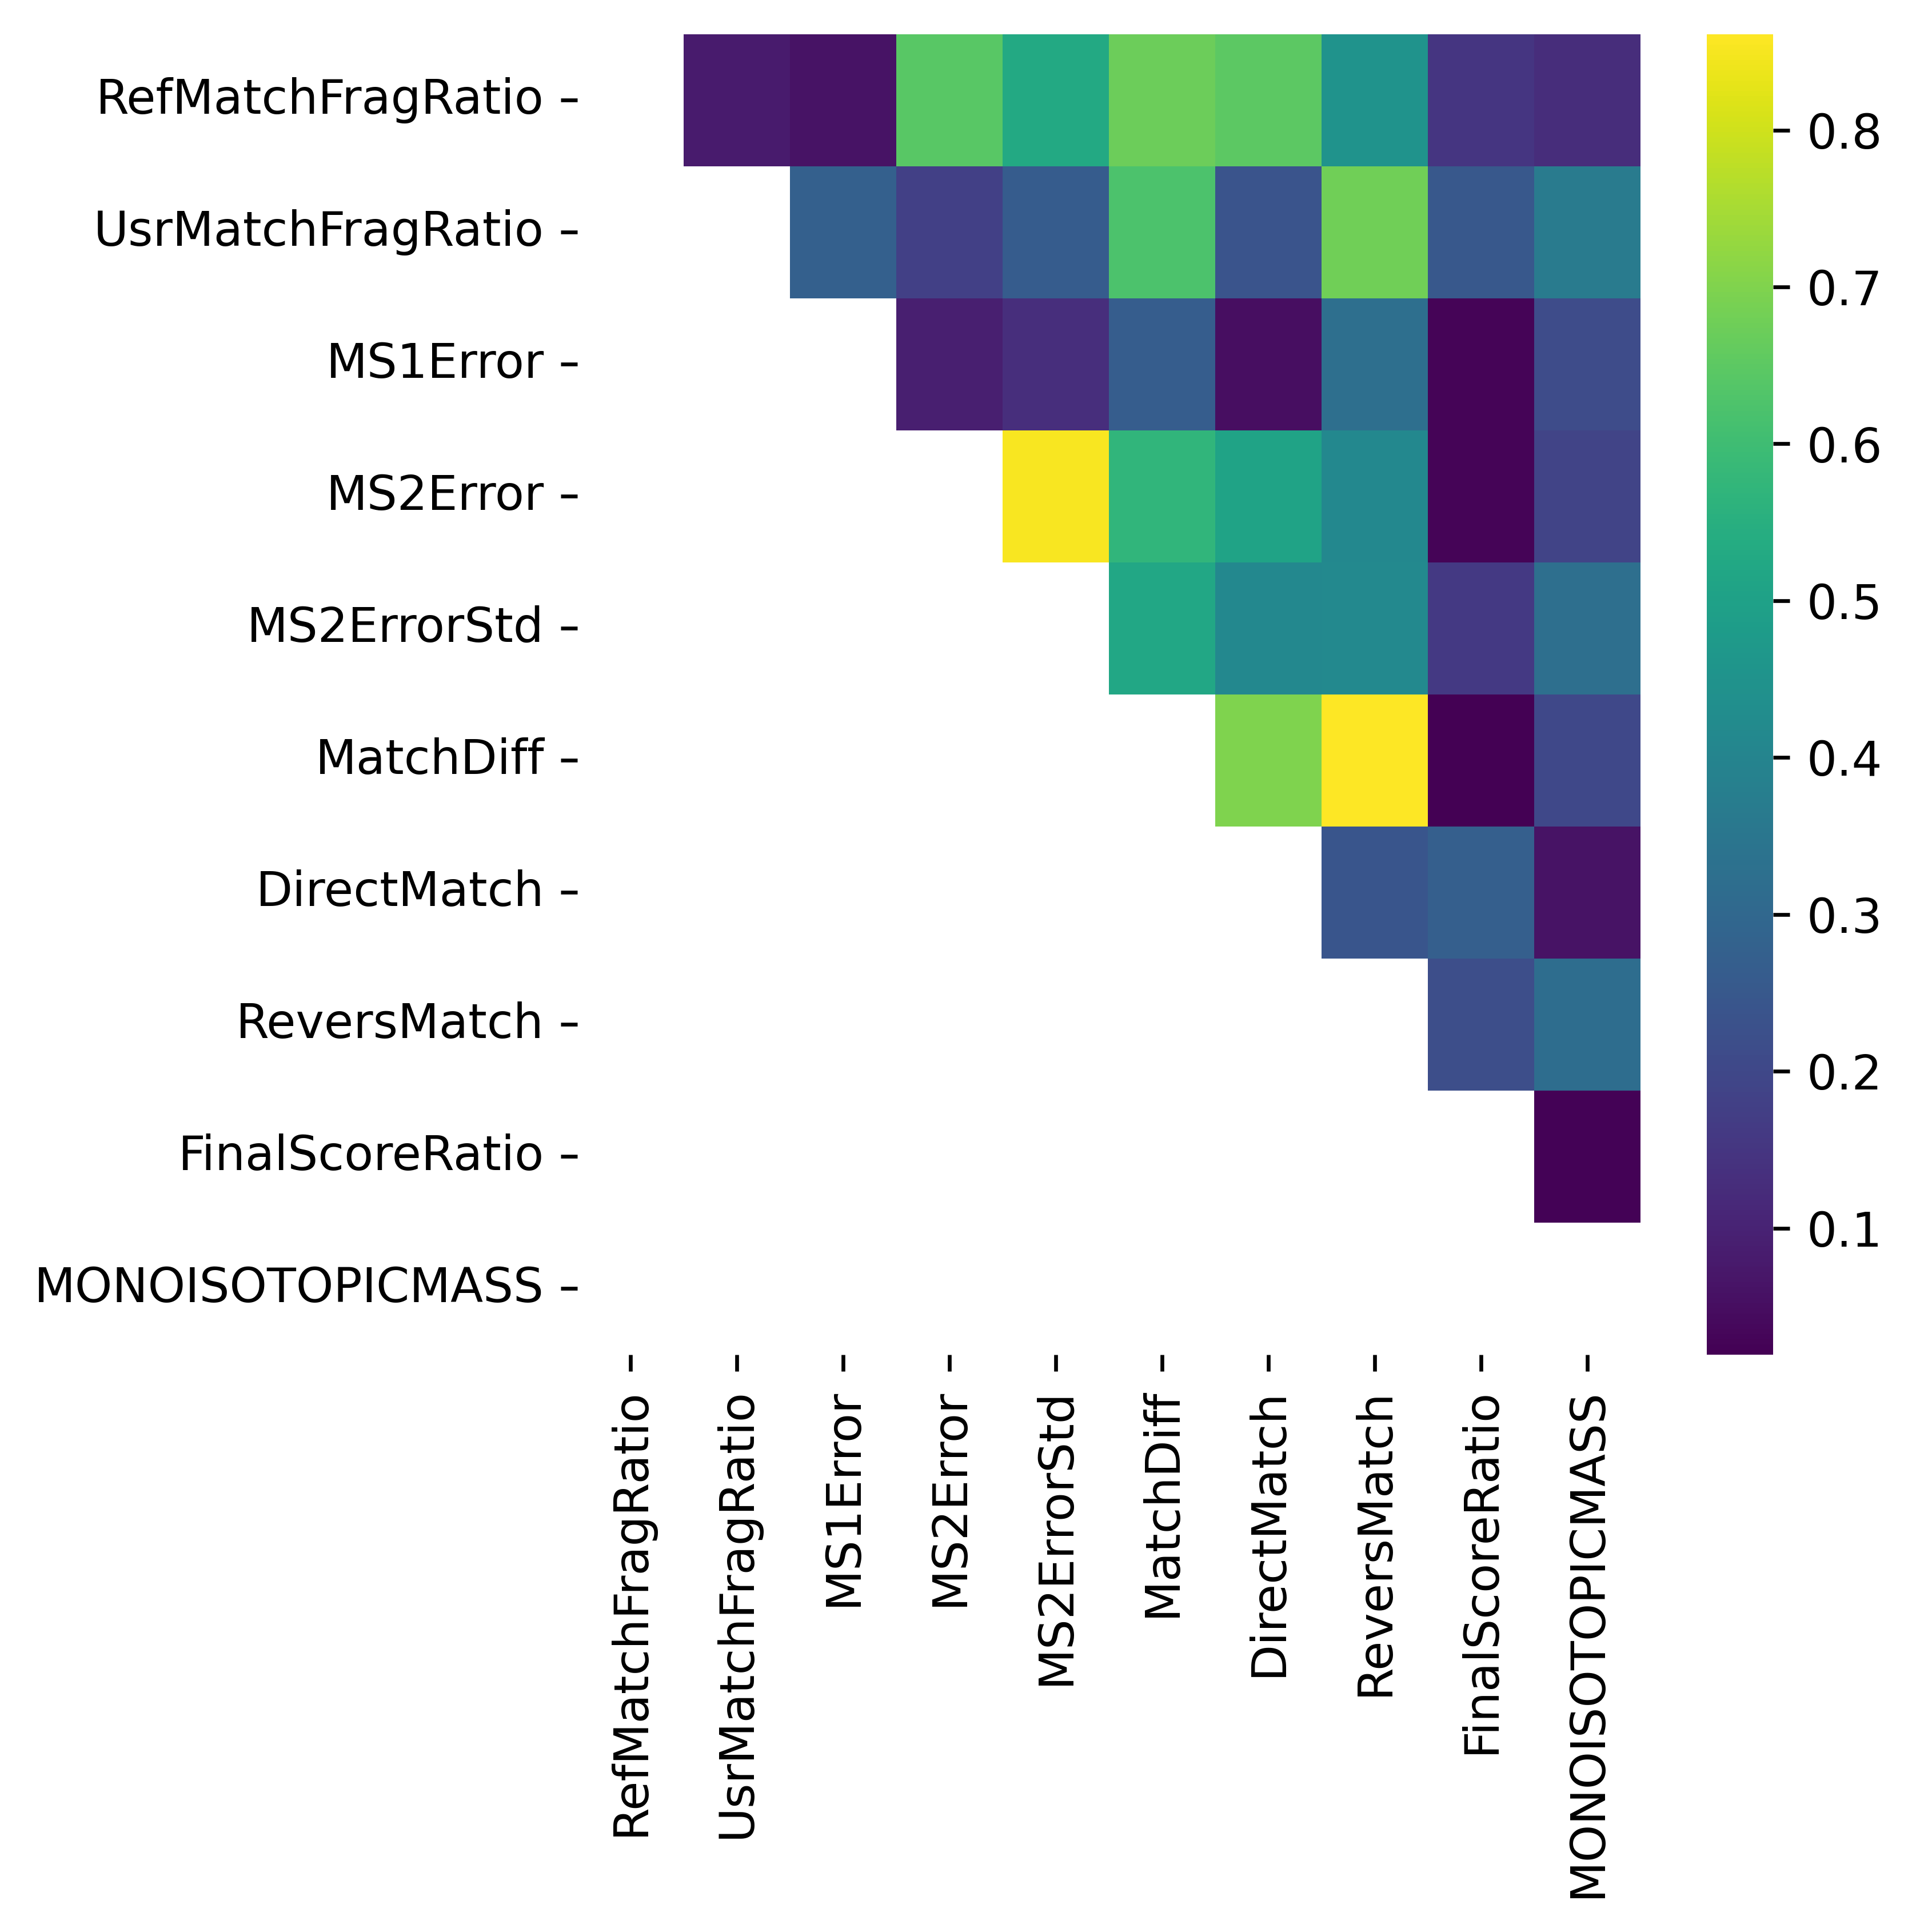

In [66]:
sns_heatmap(mz_corr(noTeaDEFSDf, "noTeaDEFSDf"))

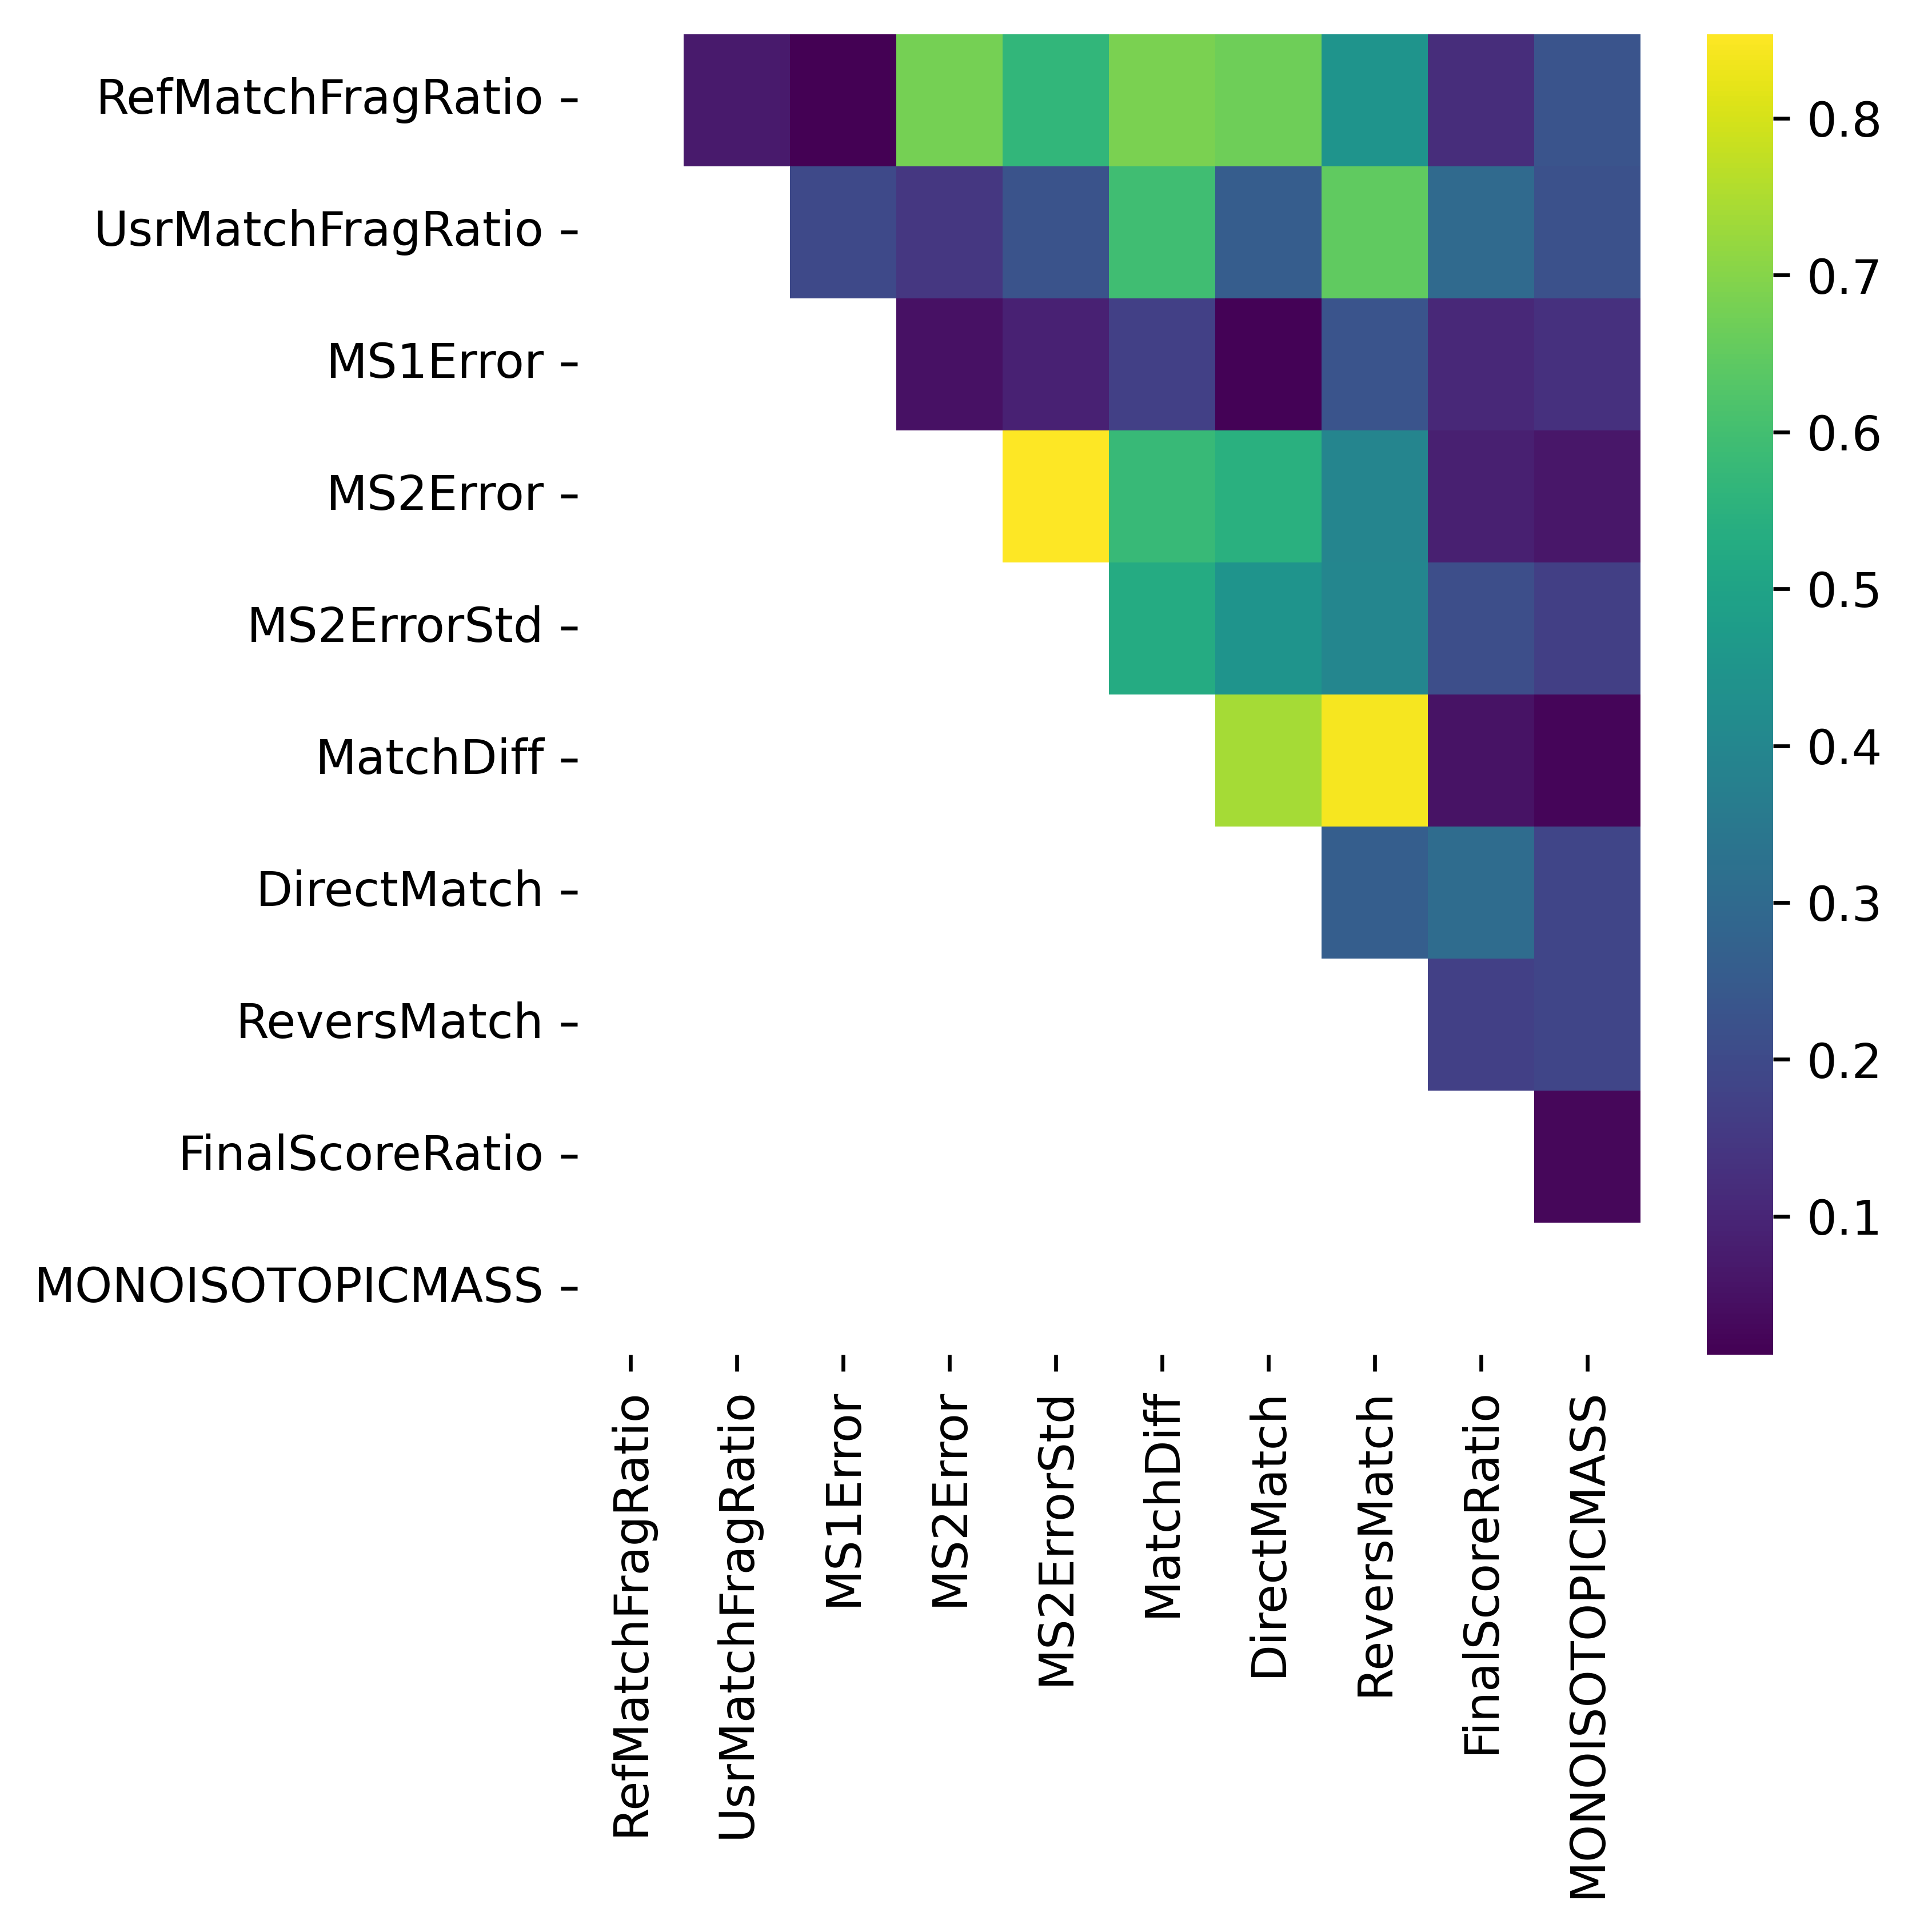

In [67]:
sns_heatmap(mz_corr(TeaDEFSDf, "TeaDEFSDf"))